In [2]:
!git clone https://github.com/laxmimerit/Image-Dataset-for-Age-Prediction.git

Cloning into 'Image-Dataset-for-Age-Prediction'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 47107 (delta 0), reused 2 (delta 0), pack-reused 47104
Receiving objects: 100% (47107/47107), 1.37 GiB | 36.35 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (24110/24110), done.


In [3]:
!pip install ktrain

     |████████████████████████████████| 25.2MB 130kB/s 
     |████████████████████████████████| 421.8MB 18kB/s 
     |████████████████████████████████| 6.7MB 55.3MB/s 
     |████████████████████████████████| 983kB 42.6MB/s 
     |████████████████████████████████| 245kB 59.2MB/s 
     |████████████████████████████████| 675kB 45.7MB/s 
     |████████████████████████████████| 471kB 52.9MB/s 
     |████████████████████████████████| 3.9MB 43.6MB/s 
     |████████████████████████████████| 450kB 56.5MB/s 
     |████████████████████████████████| 890kB 42.8MB/s 
     |████████████████████████████████| 1.1MB 40.9MB/s 
     |████████████████████████████████| 3.8MB 45.0MB/s 
  Created wheel for ktrain: filename=ktrain-0.16.3-cp36-none-any.whl size=25246180 sha256=e0278343fa598a0d4e9f7d41faa6a8c9e0cec437e43d9564c895308c512d5145
  Stored in directory: /root/.cache/pip/wheels/2b/24/21/a52cc4dcb0b438cf570e9d44c017761d41335d9af4c189ebad
  Created wheel for keras-bert: filename=keras_bert-0.84.0-cp36-no

In [4]:
%matplotlib inline
import os
import ktrain
from ktrain import vision as vis
import re

In [5]:
pattern = r'([^/]+)_\d+_\d+_\d+.jpg'

In [6]:
p = re.compile(pattern)
r = p.search('100_0_0_20170112213500903.jpg')
print(r.group(1))

100


In [7]:
DATADIR = '/content/Image-Dataset-for-Age-Prediction/images/'

In [8]:
(train_data, test_data, preproc)=vis.images_from_fname(DATADIR, pattern= pattern, random_state=42, is_regression=True)

/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:744: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/61_1_20170109142408075.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:744: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/61_3_20170109150557335.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:744: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/39_1_20170116174525125.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:744: UserWarning: Could not extract target for /content/Image-Dataset-for-A

Found 21669 validated image filenames.
Found 2432 validated image filenames.


In [9]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default LeNet-like Convolutional Neural Network


In [10]:
model = vis.image_regression_model('pretrained_resnet50', train_data= train_data, val_data= test_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94773248/94765736 [==============================] - 4s 0us/step
pretrained_resnet50 model created.


In [11]:
learner = ktrain.get_learner(model=model, train_data=train_data, val_data= test_data, batch_size=64)

In [12]:
learner.fit_onecycle(1e-4, 2)



begin training using onecycle policy with max lr of 0.0001...
Train for 339 steps, validate for 76 steps
Epoch 1/2
339/339 [==============================] - 379s 1s/step - loss: 370.7966 - mae: 14.4338 - val_loss: 219.5609 - val_mae: 11.2708
Epoch 2/2
339/339 [==============================] - 337s 995ms/step - loss: 166.1376 - mae: 9.9016 - val_loss: 205.5912 - val_mae: 10.9776


In [13]:
learner.freeze(15)
learner.fit_onecycle(1e-4,2)



begin training using onecycle policy with max lr of 0.0001...
Train for 339 steps, validate for 76 steps
Epoch 1/2
339/339 [==============================] - 387s 1s/step - loss: 105.4534 - mae: 7.7174 - val_loss: 216.0979 - val_mae: 10.5098
Epoch 2/2
339/339 [==============================] - 378s 1s/step - loss: 42.6120 - mae: 4.9416 - val_loss: 92.6519 - val_mae: 6.5776


In [14]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [15]:
test_data.filenames[10:20]

['15_0_3_20170104225537649.jpg',
 '40_0_0_20170117154553185.jpg',
 '25_0_3_20170119171618146.jpg',
 '28_0_4_20170105163451675.jpg',
 '26_0_0_20170117091206389.jpg',
 '23_1_2_20170116164541818.jpg',
 '5_1_0_20170109193659649.jpg',
 '39_1_0_20170109221036374.jpg',
 '28_0_3_20170104232432992.jpg',
 '24_1_0_20170116220232605.jpg']

In [17]:
def show_prediction(fname):
  fname = DATADIR+'/'+fname
  pred = round(predictor.predict_filename(fname)[0])
  actual = int(p.search(fname).group(1))
  vis.show_image(fname)
  print('Predicted Age : %s | Actual Age: %s'%(pred, actual))

Predicted Age : 31.0 | Actual Age: 39


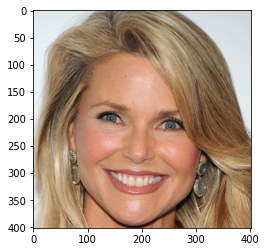

In [18]:
show_prediction('39_1_0_20170109221036374.jpg')

In [19]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


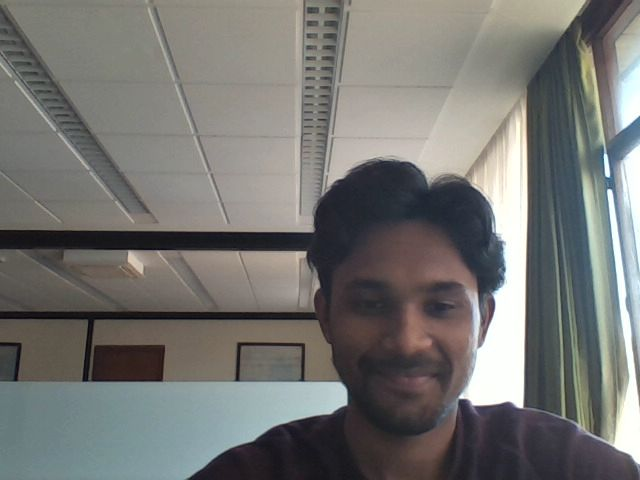

In [28]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [23]:
def real_prediction(fname):
  pred = round(predictor.predict_filename(fname)[0])
  vis.show_image(fname)
  print('Predicted Age : %s'%pred)

Predicted Age : 25.0


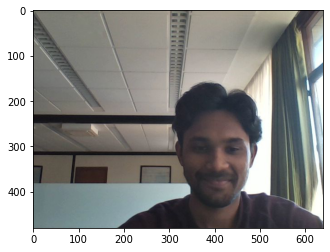

In [29]:
real_prediction('photo.jpg')